# **1. Perkenalan Dataset**


### 🧾 Dataset Description — Taiwanese Bankruptcy Prediction

**Sumber Dataset:**
Dataset ini berasal dari **Taiwan Economic Journal** untuk periode tahun **1999 hingga 2009**, dan diperoleh dari **UCI Machine Learning Repository**:
🔗 [Taiwanese Bankruptcy Prediction Dataset](https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction)

**Deskripsi Umum:**
Dataset ini berisi **rasio keuangan perusahaan publik di Taiwan** yang digunakan untuk **memprediksi kemungkinan kebangkrutan (bankruptcy)** suatu perusahaan. Status kebangkrutan ditentukan berdasarkan regulasi bisnis dari **Taiwan Stock Exchange**. Dataset ini sering digunakan dalam penelitian analisis keuangan dan deteksi risiko korporat.

**Tujuan Penggunaan Dataset:**
Membangun model **klasifikasi biner** untuk memprediksi apakah suatu perusahaan berpotensi **bangkrut (1)** atau **tidak bangkrut (0)** berdasarkan indikator keuangan historisnya.

---

### 📊 Informasi Atribut

* **Target (Y)**
  `Bankrupt?` → Kelas target biner (1 = Bangkrut, 0 = Tidak bangkrut)

* **Fitur (X1 – X95)**
  Dataset memiliki **95 fitur input (rasio keuangan)** yang mencakup berbagai aspek:

  * **Profitabilitas** → Return on Assets, Gross Margin, Profit Growth Rate
  * **Likuiditas** → Current Ratio, Quick Ratio, Cash Flow Ratio
  * **Leverage & Solvabilitas** → Debt Ratio, Liability to Equity, Interest Coverage
  * **Aktivitas & Efisiensi** → Asset Turnover, Inventory Turnover, Collection Days
  * **Pertumbuhan & Nilai Saham** → EPS Growth, Book Value per Share
  * **Cash Flow & Modal Kerja** → Cash Flow to Assets, Working Capital Ratio

Setiap fitur direpresentasikan sebagai rasio atau indikator numerik yang mencerminkan kondisi finansial perusahaan.

---

### 📈 Karakteristik Dataset

| Atribut          | Nilai                                                           |
| ---------------- | --------------------------------------------------------------- |
| Jumlah sampel    | ±6.819 perusahaan                                               |
| Jumlah fitur     | 95                                                              |
| Jenis fitur      | Numerik (rasio keuangan)                                        |
| Target           | `Bankrupt?` (0 atau 1)                                          |
| Jenis tugas      | Klasifikasi biner                                               |
| Periode data     | 1999 – 2009                                                     |
| Sumber data      | Taiwan Economic Journal                                         |
| Referensi ilmiah | Liang et al. (2016), *European Journal of Operational Research* |

---

### 📚 Referensi Penelitian

Liang, D., Lu, C.-C., Tsai, C.-F., & Shih, G.-A. (2016).
*Financial Ratios and Corporate Governance Indicators in Bankruptcy Prediction: A Comprehensive Study.*
**European Journal of Operational Research, 252(2), 561–572.**
🔗 [Link Paper](https://www.sciencedirect.com/science/article/pii/S0377221716000412)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Data & Visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pra-pemrosesan & Model ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

# Utility
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


import mlflow
import mlflow.sklearn

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("Membangun_Model/dataset/Company_Bankruptcy_Prediction_data.csv")

print(df.info(100))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [32]:
df.info()
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [33]:
df.dtypes.value_counts()

float64    93
int64       3
Name: count, dtype: int64

In [34]:
# Ringkasan statistik numerik
df.describe().T.style.background_gradient(cmap='Blues').format(precision=3)

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.000,0.032,0.177,0.000,0.000,0.000,0.000,1.000
ROA(C) before interest and depreciation before interest,6819.000,0.505,0.061,0.000,0.477,0.503,0.536,1.000
ROA(A) before interest and % after tax,6819.000,0.559,0.066,0.000,0.536,0.560,0.589,1.000
ROA(B) before interest and depreciation after tax,6819.000,0.554,0.062,0.000,0.527,0.552,0.584,1.000
Operating Gross Margin,6819.000,0.608,0.017,0.000,0.600,0.606,0.614,1.000
Realized Sales Gross Margin,6819.000,0.608,0.017,0.000,0.600,0.606,0.614,1.000
Operating Profit Rate,6819.000,0.999,0.013,0.000,0.999,0.999,0.999,1.000
Pre-tax net Interest Rate,6819.000,0.797,0.013,0.000,0.797,0.797,0.798,1.000
After-tax net Interest Rate,6819.000,0.809,0.014,0.000,0.809,0.809,0.809,1.000
Non-industry income and expenditure/revenue,6819.000,0.304,0.011,0.000,0.303,0.304,0.304,1.000


In [35]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if missing.empty:
    print("✅ Tidak ada missing values dalam dataset.")
else:
    plt.figure(figsize=(8,6))
    sns.barplot(x=missing.values, y=missing.index, palette='Reds_r')
    plt.title("Jumlah Missing Value per Kolom")
    plt.xlabel("Jumlah Missing")
    plt.ylabel("Fitur")
    plt.show()

duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

✅ Tidak ada missing values dalam dataset.
Jumlah data duplikat: 0


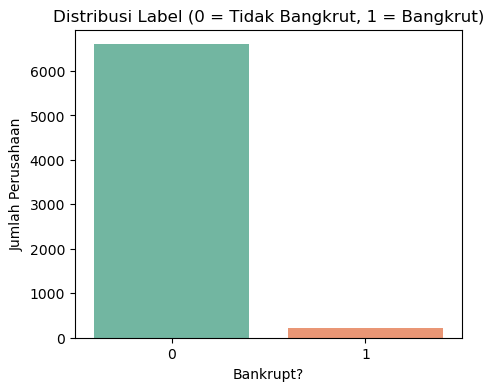

Bankrupt?
0    96.77%
1     3.23%
Name: proportion, dtype: object

In [36]:
plt.figure(figsize=(5,4))
sns.countplot(x='Bankrupt?', data=df, palette='Set2')
plt.title("Distribusi Label (0 = Tidak Bangkrut, 1 = Bangkrut)")
plt.xlabel("Bankrupt?")
plt.ylabel("Jumlah Perusahaan")
plt.show()

# Rasio kelas
df['Bankrupt?'].value_counts(normalize=True).map("{:.2%}".format)

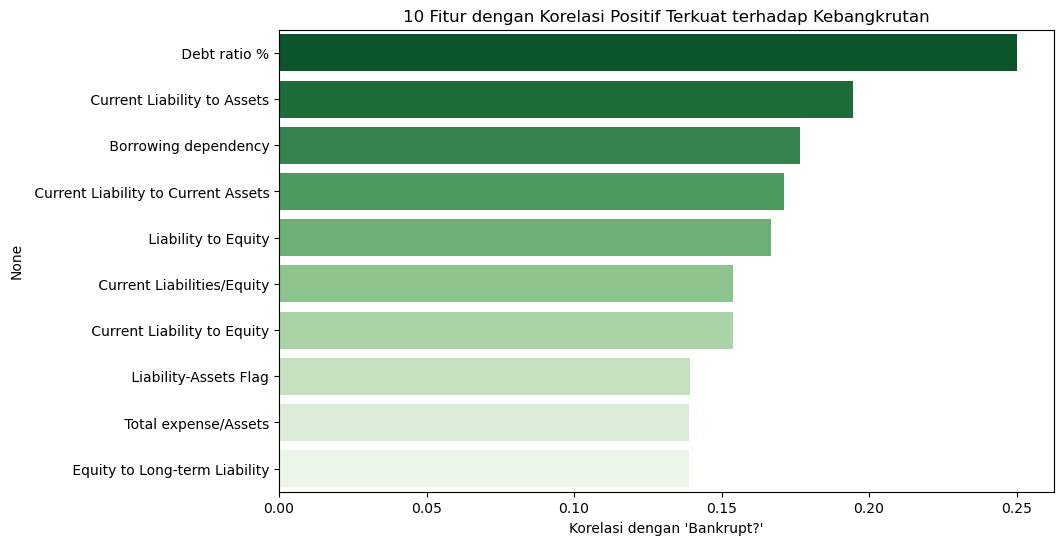

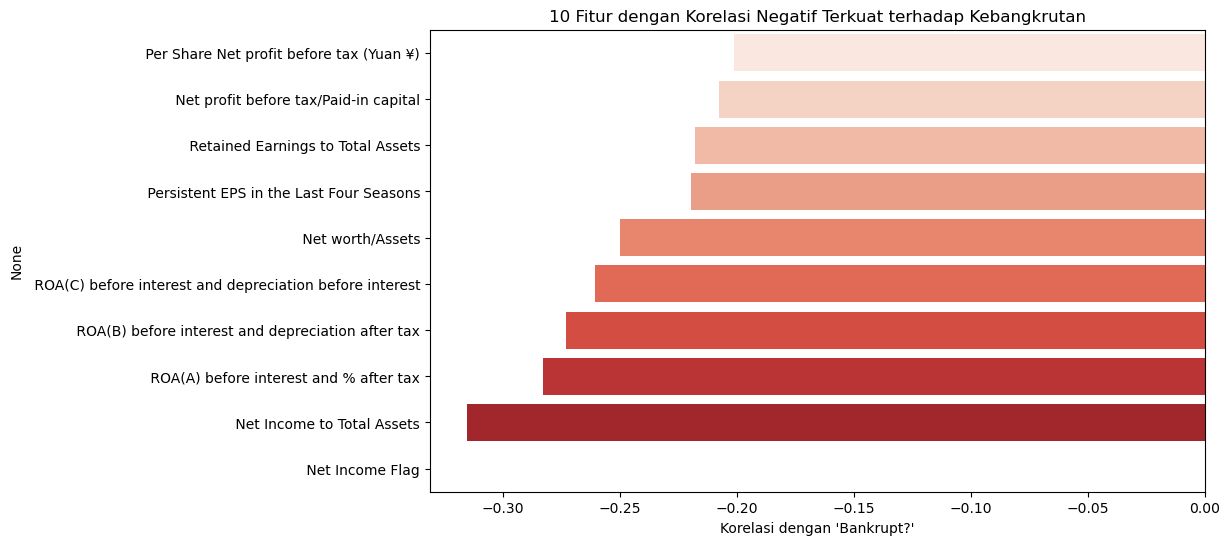

In [37]:
# Hitung korelasi
corr = df.corr(numeric_only=True)['Bankrupt?'].sort_values(ascending=False)

# Tampilkan 10 fitur dengan korelasi tertinggi
top_corr = corr[1:11]  # abaikan target itu sendiri
bottom_corr = corr[-10:]

plt.figure(figsize=(10,6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='Greens_r')
plt.title("10 Fitur dengan Korelasi Positif Terkuat terhadap Kebangkrutan")
plt.xlabel("Korelasi dengan 'Bankrupt?'")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=bottom_corr.values, y=bottom_corr.index, palette='Reds')
plt.title("10 Fitur dengan Korelasi Negatif Terkuat terhadap Kebangkrutan")
plt.xlabel("Korelasi dengan 'Bankrupt?'")
plt.show()

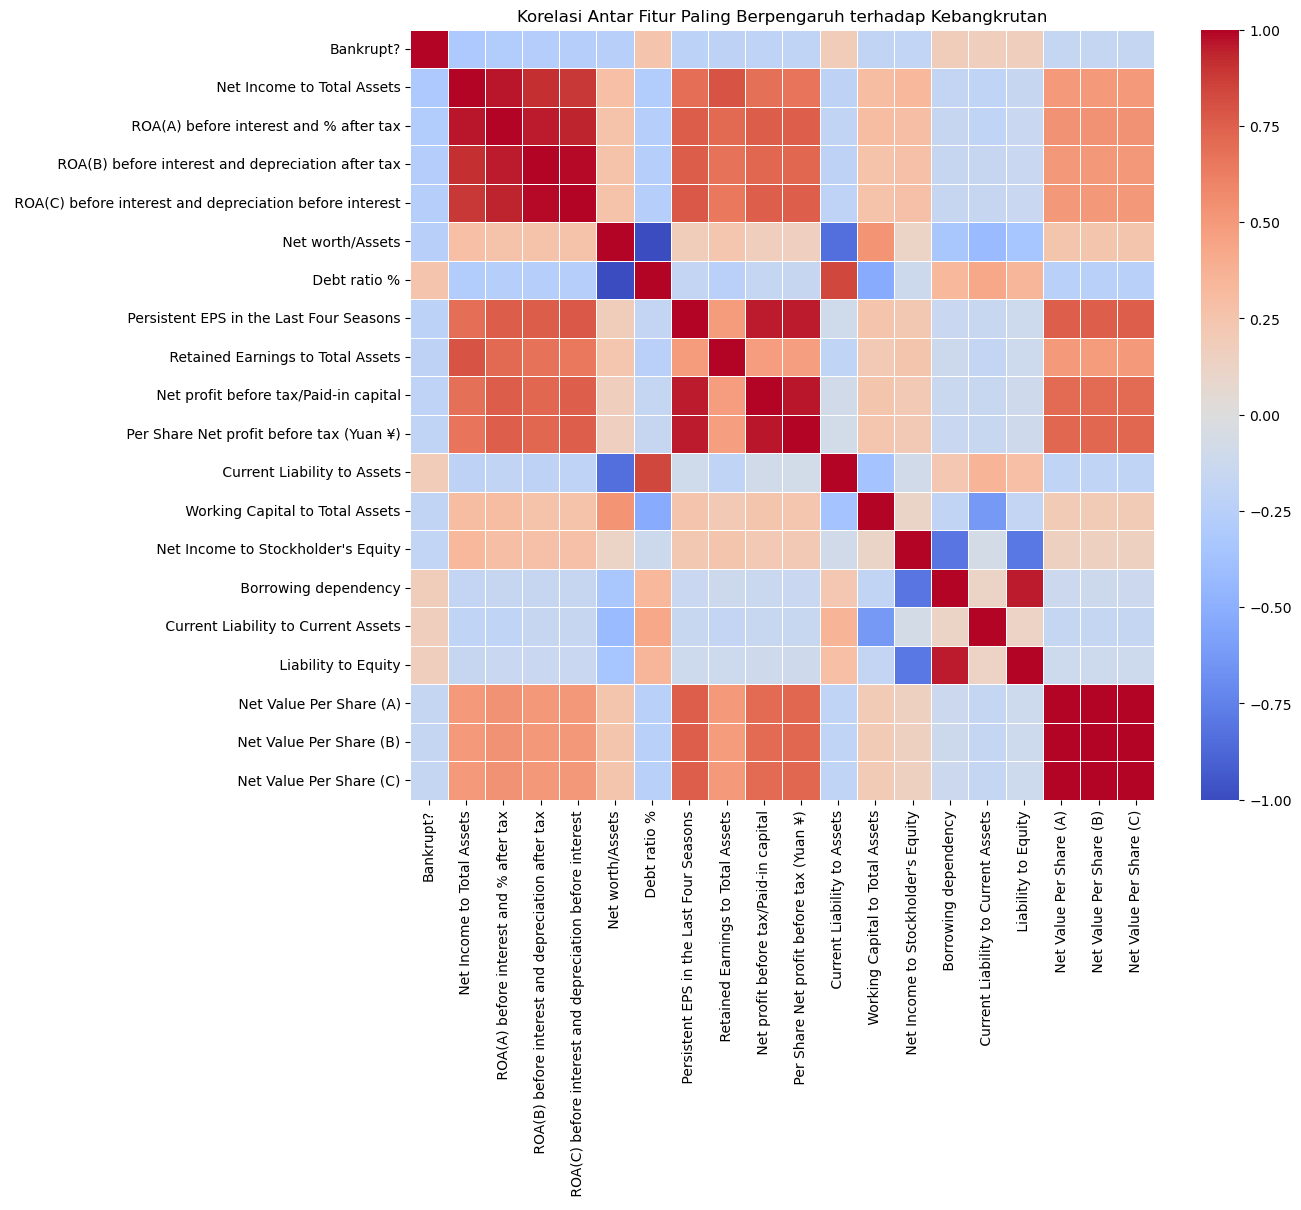

In [38]:
plt.figure(figsize=(12,10))
top_features = df.corr(numeric_only=True)['Bankrupt?'].abs().sort_values(ascending=False).head(20).index
sns.heatmap(df[top_features].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasi Antar Fitur Paling Berpengaruh terhadap Kebangkrutan")
plt.show()


## 📊 **Data Insight**

### 1. **Distribusi Target (Bankrupt?)**

| Kelas              | Jumlah | Persentase |
| ------------------ | ------ | ---------- |
| Tidak Bangkrut (0) | 6.599  | 96.77%     |
| Bangkrut (1)       | 220    | 3.23%      |

➡ **Dataset sangat tidak seimbang**, artinya model perlu **penyesuaian bobot kelas** atau **oversampling** untuk menghindari bias pada kelas mayoritas.

---

### 2. **Kualitas Data**

* ✅ **Tidak ada missing values** ditemukan dalam seluruh kolom.
* ✅ **Tidak ada data duplikat** yang perlu dihapus.
  ➤ Dataset bersih dan siap diproses untuk tahap feature engineering serta pemodelan.

---

### 3. **Analisis Korelasi**

#### 🔺 *Fitur dengan Korelasi Positif Terkuat terhadap Kebangkrutan*

* Fitur-fitur yang **meningkat ketika kemungkinan bangkrut meningkat** meliputi:

  1. **Debt ratio %**
  2. **Current Liability to Assets**
  3. **Borrowing dependency**
  4. **Current Liability to Current Assets**
  5. **Liability to Equity**
  6. **Current Liabilities/Equity**
  7. **Current Liability to Equity**
  8. **Liability-Assets Flag**
  9. **Total expense/Assets**
  10. **Equity to Long-term Liability**

  ➤ **Interpretasi:**
  Semakin tinggi ketergantungan perusahaan terhadap utang dan beban kewajiban jangka pendek, semakin besar risiko kebangkrutan.
  Rasio utang yang tinggi menunjukkan **struktur modal tidak sehat** dan **likuiditas rendah**.

---

#### 🔻 *Fitur dengan Korelasi Negatif Terkuat terhadap Kebangkrutan*

* Fitur-fitur yang **menurun ketika risiko bangkrut meningkat**:

  1. **Net Income Flag**
  2. **Net Income to Total Assets**
  3. **ROA(A/B/C)** (Return on Assets dengan berbagai pendekatan)
  4. **Net worth/Assets**
  5. **Persistent EPS in the Last Four Seasons**
  6. **Retained Earnings to Total Assets**
  7. **Net profit before tax/Paid-in capital**
  8. **Per Share Net profit before tax (Yuan ¥)**

  ➤ **Interpretasi:**
  Semakin baik kinerja profitabilitas perusahaan, semakin kecil peluang kebangkrutan.
  Indikator seperti **ROA, EPS, dan laba bersih terhadap aset** menunjukkan kemampuan perusahaan menghasilkan keuntungan dari sumber daya yang dimiliki.

---

### 4. **Insight Utama**

* **Kebangkrutan perusahaan sangat berkorelasi dengan dua aspek utama:**

  1. **Struktur Utang dan Likuiditas (rasio positif)** — semakin tinggi beban utang, semakin tinggi risiko bangkrut.
  2. **Profitabilitas dan Efisiensi Aset (rasio negatif)** — semakin besar laba dan pengembalian aset, semakin kecil risiko bangkrut.
* Dataset ini menunjukkan adanya **kontras kuat antara leverage tinggi dan profitabilitas rendah** sebagai indikator utama kebangkrutan.

---

### 5. **Analisis Statistik Umum**

| Statistik                                                      | Nilai Rata-rata                | Standar Deviasi                                                                | Catatan                                         |
| -------------------------------------------------------------- | ------------------------------ | ------------------------------------------------------------------------------ | ----------------------------------------------- |
| Mean sebagian besar rasio keuangan                             | antara 0.1 – 0.9               | rendah (0.01–0.06)                                                             | menunjukkan skala rasio yang seragam            |
| Nilai ekstrem (min=0, max=1)                                   | muncul di hampir semua kolom   | —                                                                              | banyak fitur sudah distandardisasi ke skala 0–1 |
| Namun sebagian fitur memiliki nilai **ribuan hingga miliaran** | sangat besar std & mean tinggi | indikasi adanya **outlier ekstrem** atau **satuan yang tidak distandardisasi** |                                                 |

---

### 6. **Deteksi Outlier Berdasarkan Statistik**

Beberapa kolom memiliki **standar deviasi jauh lebih besar dari mean**, bahkan sampai jutaan kali lipat — ini menunjukkan **anomali atau outlier berat**.

| Fitur                                                          | Mean                   | Std          | Rasio (Std/Mean)          | Catatan                              |
| -------------------------------------------------------------- | ---------------------- | ------------ | ------------------------- | ------------------------------------ |
| `Operating Expense Rate`                                       | 1.99e9                 | 3.24e9       | **>1.5x**                 | Sangat tidak normal, outlier ekstrem |
| `Research and development expense rate`                        | 1.95e9                 | 2.59e9       | **>1.3x**                 | Outlier ekstrem                      |
| `Current Ratio`, `Quick Ratio`, `Accounts Receivable Turnover` | jutaan hingga milyaran | besar sekali | Distorsi skala            |                                      |
| `Inventory Turnover Rate (times)`                              | 2.1e9                  | 3.2e9        | besar                     | Skala tidak realistis                |
| `Total Asset Growth Rate`, `Revenue per person`                | >5e9                   | tinggi       | Kemungkinan skala berbeda |                                      |

➡ **Kesimpulan:**

* Ada fitur yang **berbeda skala (skewed heavily)** dibanding fitur lain.
* Sebelum modeling, perlu dilakukan **scaling atau log transformation** (misal `np.log1p`) untuk menstabilkan distribusi.

---

### 7. **Kolom Konstan / Hampir Konstan**

Beberapa fitur menunjukkan **deviasi yang sangat kecil** (nyaris konstan), contohnya:

* `Operating Profit Rate` → mean = 0.999, std = 0.013
* `After-tax net Interest Rate` → mean = 0.809, std = 0.014
* `Operating Profit Growth Rate` → mean = 0.848, std = 0.011
* `Net Income Flag` → mean = 1.0, std = 0.000

➡ Kolom seperti ini **tidak memberikan variasi informasi** → bisa **dihapus dari fitur training** karena tidak berkontribusi pada prediksi.

---

### 8. **Nilai yang Tidak Proporsional / Potensi Salah Input**

Fitur dengan nilai maksimum **9.99e9 atau 1e10** muncul berulang pada banyak kolom:

* `Operating Expense Rate`, `Quick Asset Turnover Rate`, `Cash Turnover Rate`, `Fixed Assets Turnover Frequency`, dll.

➡ Pola ini sangat khas dari **data dummy atau placeholder angka maksimum**, kemungkinan besar menunjukkan **missing value yang dikodekan sebagai “9990000000” atau “10000000000”

---

### 9. **Insight Keuangan Awal**

* **Rasio profitabilitas** (`ROA`, `Net Income to Total Assets`, `Operating Profit`) cenderung **positif dan stabil**, menunjukkan sebagian besar perusahaan dalam keadaan sehat.
* **Rasio leverage** (`Debt Ratio %`, `Liability to Equity`, `Borrowing Dependency`) bervariasi tinggi → faktor utama kebangkrutan.
* **Likuiditas** (`Current Ratio`, `Quick Ratio`) memiliki nilai yang sangat ekstrim → perlu normalisasi agar tidak mendominasi skala.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [3]:
# ====================================================
# 1. Identifikasi dan Tangani Nilai Placeholder (9990000000 / 10000000000)
# ====================================================
# Nilai seperti ini biasanya representasi missing value dalam dataset keuangan
placeholder_values = [9990000000, 10000000000, 999000000, 1000000000]
df = df.replace(placeholder_values, np.nan)

print("\nJumlah missing value setelah mengganti placeholder:")
print(df.isna().sum().sort_values(ascending=False).head(10))

# ====================================================
# 2. Hapus Fitur Konstan / Hampir Konstan
# ====================================================
# Kolom dengan variasi (std) < 1e-5 dianggap tidak informatif
low_variance_cols = [col for col in df.columns if df[col].std() < 1e-5]
print(f"\nJumlah fitur konstan/hampir konstan: {len(low_variance_cols)}")

# Hapus fitur tersebut
df.drop(columns=low_variance_cols, inplace=True)

# ====================================================
# 3. Pisahkan Fitur dan Target
# ====================================================
target_col = 'Bankrupt?'  # sesuaikan dengan nama kolom target
X = df.drop(columns=[target_col])
y = df[target_col]

# ====================================================
# 4. Imputasi Missing Values
# ====================================================
# Gunakan median karena dataset berisi rasio keuangan dengan banyak outlier
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ====================================================
# 5. Scaling (RobustScaler)
# ====================================================
# RobustScaler cocok karena tahan terhadap outlier ekstrem
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# ====================================================
# 🔀 7. Split Data Train & Test
# ====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\n✅ Data preprocessing selesai!")
print(f"Ukuran data train: {X_train.shape}")
print(f"Ukuran data test: {X_test.shape}")

# ====================================================
# 🔎 8. Validasi Akhir
# ====================================================
print("\nCek distribusi kelas pada train dan test:")
print("Train:")
print(y_train.value_counts(normalize=True))
print("\nTest:")
print(y_test.value_counts(normalize=True))



Jumlah missing value setelah mengganti placeholder:
Fixed Assets Turnover Frequency          12
Quick Asset Turnover Rate                10
Cash Turnover Rate                        8
Research and development expense rate     7
Current Asset Turnover Rate               6
Inventory Turnover Rate (times)           5
Operating Expense Rate                    1
Total Asset Growth Rate                   1
Net Income to Stockholder's Equity        0
Current Liability to Assets               0
dtype: int64

Jumlah fitur konstan/hampir konstan: 1

✅ Data preprocessing selesai!
Ukuran data train: (5455, 94)
Ukuran data test: (1364, 94)

Cek distribusi kelas pada train dan test:
Train:
Bankrupt?
0    0.967736
1    0.032264
Name: proportion, dtype: float64

Test:
Bankrupt?
0    0.967742
1    0.032258
Name: proportion, dtype: float64


In [5]:
# Ekspor 5 baris pertama ke file CSV
df.head(5).to_csv('output.csv', index=False)


# **6. Experiment**

In [43]:
# --- 1. Inisialisasi model ---
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

# --- 2. Training model ---
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True
)

# --- 3. Ambil hasil evaluasi ---
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

[0]	validation_0-logloss:0.15378	validation_1-logloss:0.16269
[1]	validation_0-logloss:0.12144	validation_1-logloss:0.13553
[2]	validation_0-logloss:0.09835	validation_1-logloss:0.11678
[3]	validation_0-logloss:0.07989	validation_1-logloss:0.10546
[4]	validation_0-logloss:0.06622	validation_1-logloss:0.09710
[5]	validation_0-logloss:0.05634	validation_1-logloss:0.09193
[6]	validation_0-logloss:0.04800	validation_1-logloss:0.08822
[7]	validation_0-logloss:0.04177	validation_1-logloss:0.08646
[8]	validation_0-logloss:0.03648	validation_1-logloss:0.08356
[9]	validation_0-logloss:0.03206	validation_1-logloss:0.08250
[10]	validation_0-logloss:0.02855	validation_1-logloss:0.08138
[11]	validation_0-logloss:0.02622	validation_1-logloss:0.08100
[12]	validation_0-logloss:0.02391	validation_1-logloss:0.07960
[13]	validation_0-logloss:0.02218	validation_1-logloss:0.08011
[14]	validation_0-logloss:0.02073	validation_1-logloss:0.08127
[15]	validation_0-logloss:0.01927	validation_1-logloss:0.08167
[1

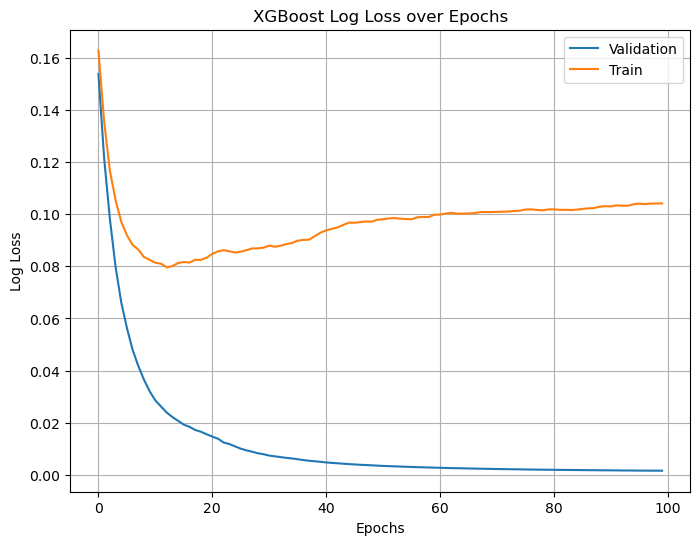

Accuracy: 0.9736070381231672
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1320
           1       0.67      0.36      0.47        44

    accuracy                           0.97      1364
   macro avg       0.82      0.68      0.73      1364
weighted avg       0.97      0.97      0.97      1364



In [44]:
# --- 4. Plot logloss ---
plt.figure(figsize=(8, 6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Validation')
plt.plot(x_axis, results['validation_1']['logloss'], label='Train')
plt.title('XGBoost Log Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()

# --- 5. Evaluasi performa ---
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [45]:
print(f"""Train Score : {model.score(X_train,y_train) * 100:.2f}%""")
print(f"""Test Score : {model.score(X_test,y_test) * 100:.2f}%""")

Train Score : 100.00%
Test Score : 97.36%


In [49]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")  

mlflow.set_experiment("company_bankrupcy_model")


# Jalankan run MLflow
with mlflow.start_run():
    # Model dan parameter
    model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Logging parameter, metrics, dan model
    mlflow.log_param("n_estimators", 100)
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(model, "model")

    print(f"Accuracy: {acc}")


2025/11/02 04:59:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/02 05:00:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Accuracy: 0.9736070381231672
🏃 View run fortunate-finch-352 at: http://127.0.0.1:5000/#/experiments/898078872594077427/runs/2ab7ccb303204443bffcdedb5d669c79
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/898078872594077427
